In [23]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:

iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
df = iris.frame

print("Column Names:", list(X.columns))


Column Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [26]:

y_pred = nb.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9111111111111111

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



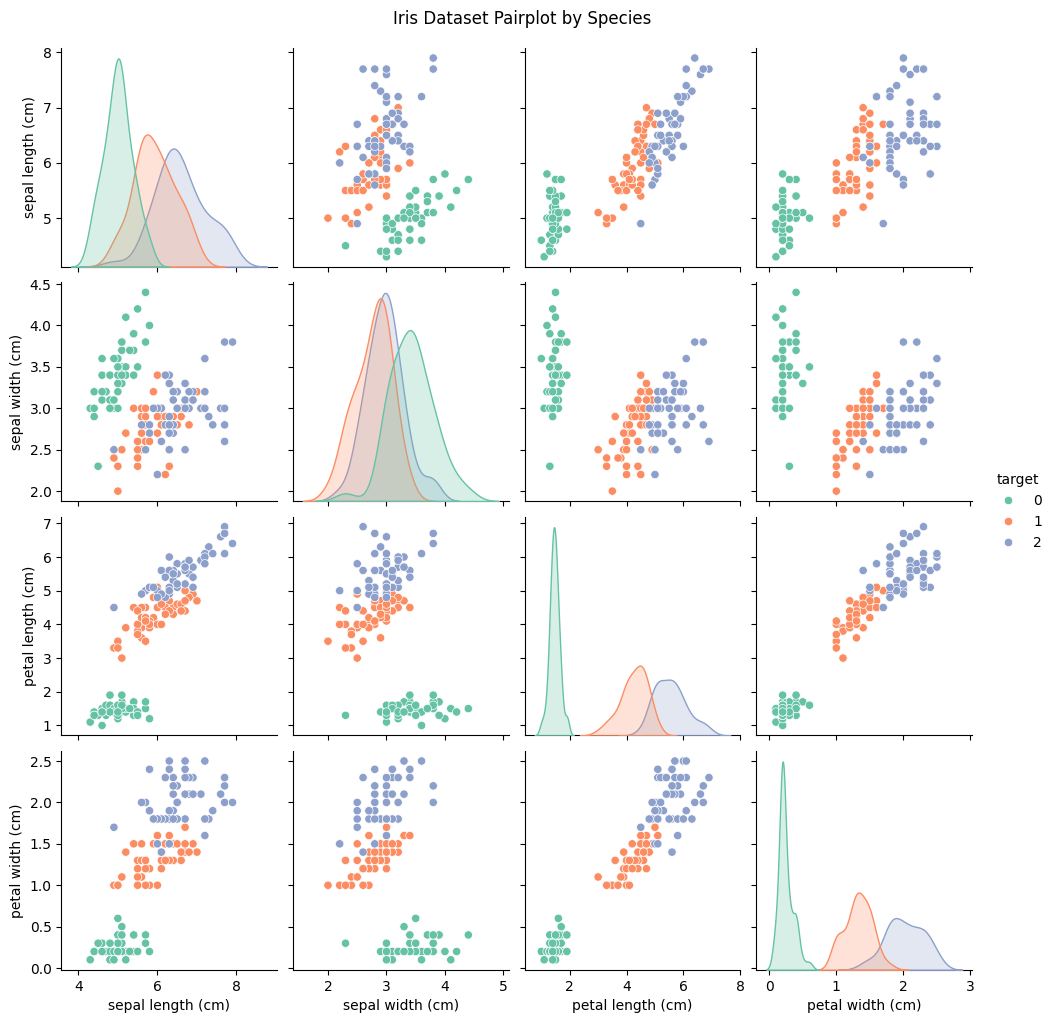

In [27]:

sns.pairplot(df, hue="target", palette="Set2", diag_kind="kde")
plt.suptitle("Iris Dataset Pairplot by Species", y=1.02)
plt.show()

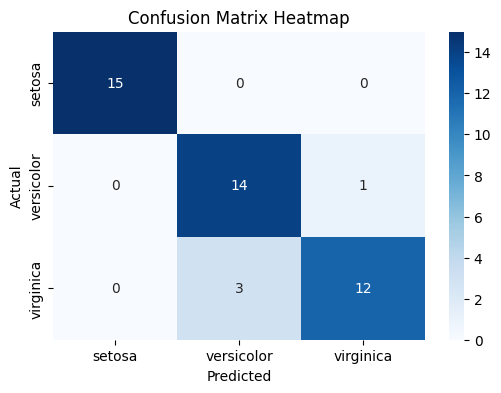

In [28]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

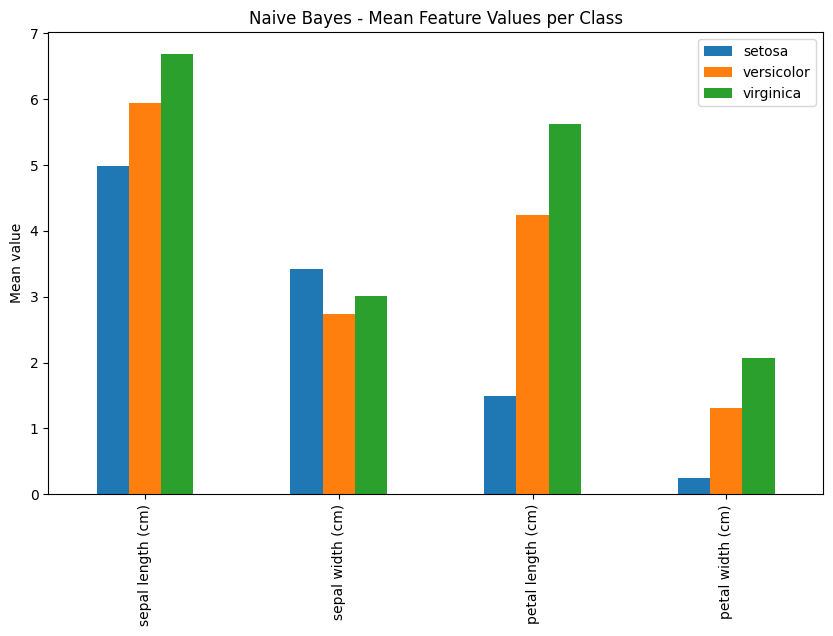

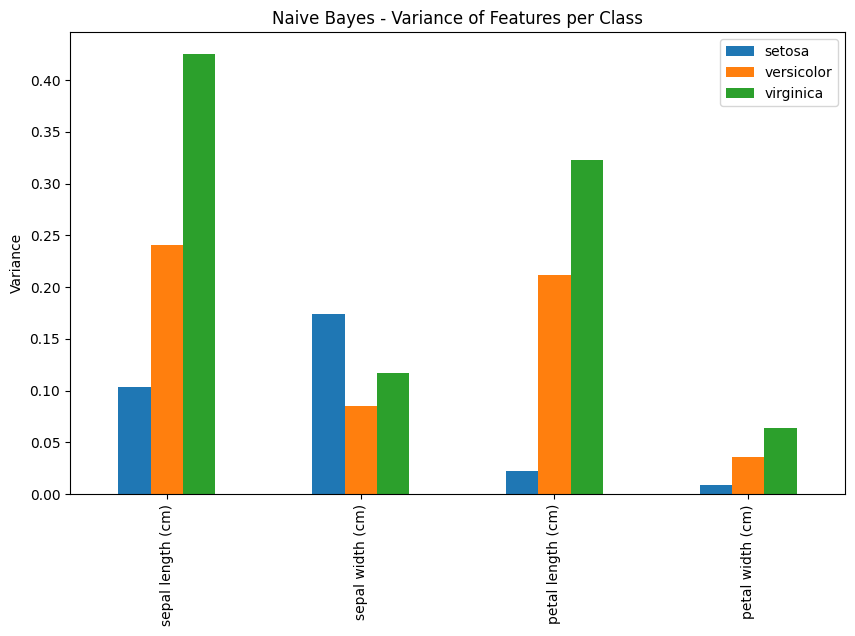

In [29]:

feature_means = pd.DataFrame(nb.theta_, columns=X.columns, index=iris.target_names)
feature_vars = pd.DataFrame(nb.var_, columns=X.columns, index=iris.target_names)

feature_means.T.plot(kind="bar", figsize=(10,6))
plt.title("Naive Bayes - Mean Feature Values per Class")
plt.ylabel("Mean value")
plt.show()

feature_vars.T.plot(kind="bar", figsize=(10,6))
plt.title("Naive Bayes - Variance of Features per Class")
plt.ylabel("Variance")
plt.show()
